In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from matplotlib.patches import Patch

In [6]:
data_path = '/data/willett_data/paper_results/'

In [7]:
def rename_keys_by_map(d, key_map):
    """
    Renames keys in a dictionary using a mapping from old to new keys.

    Args:
        d (dict): Original dictionary.
        key_map (dict): Mapping from old keys to new keys.

    Returns:
        dict: Dictionary with renamed keys.
    """
    return {key_map.get(k, k): v for k, v in d.items()}

def reorder_dict(d, key_order):
    """
    Returns a new dict with keys ordered as specified in key_order.

    Args:
        d (dict): The original dictionary.
        key_order (list): Desired order of keys.

    Returns:
        dict: Reordered dictionary.
    """
    return {k: d[k] for k in key_order if k in d}

In [8]:
with open(data_path + 'ventral_dict_comp.pkl', 'rb') as f:
    ventral_6v_perf = pickle.load(f)

with open(data_path + 'ventral_dict_val.pkl', 'rb') as f:
    ventral_6v_perf_val = pickle.load(f)
    
replace_keys = {'neurips_gru_ventral_6v_only_seed_': 'GRU',
                'neurips_transformer_time_masked_ventral_6v_only_seed_': 'Transformer'}

ventral_6v_perf = rename_keys_by_map(ventral_6v_perf, replace_keys)
print(ventral_6v_perf)


held_out_days_perf = {'GRU': [46.109, 46.366, 46.812, 46.082], 
                     'Transformer': [43.362, 43.497, 42.374, 42.563]}

restricted_days_perf = {'GRU': [26.688, 26.972, 26.688, 27.081], 
                     'Transformer': [23.657, 22.926, 23.17, 22.872]}

{'GRU': [21.302, 21.194, 21.573], 'Transformer': [17.58, 18.5, 18.162, 17.255]}


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

def plot_model_perf_with_benchmark(
    fig,
    axes,
    idx,
    data_dict,
    transf_orig_perf,
    gru_orig_perf,
    title,
    show_legend=True,
):
    """Draw a bar‑plus‑strip plot on the idx‑th Axes inside fig."""
    # ---------- tidy to long‑form DataFrame ----------
    df = pd.DataFrame(
        [{"Model": m, "Error Rate": v}
         for m, vals in data_dict.items()
         for v in vals]
    )

    palette = {
        "Transformer": "#4f81bd",  # lighter blue
        "GRU":         "#b266b2",  # lighter purple
    }

    ax = axes[idx]
    ax.clear()

    # ---------- mean bars ----------
    sns.barplot(
        data=df,
        x="Model", y="Error Rate",
        hue="Model",           # required so palette works w/o warning
        dodge=False, legend=False,
        estimator="mean", errorbar=None,
        palette=palette, width=0.5,
        ax=ax, zorder=0
    )

    # ---------- individual seeds ----------
    sns.stripplot(
        data=df,
        x="Model", y="Error Rate",
        jitter=True, dodge=False,
        linewidth=1, edgecolor="none",
        color="black",          # single colour → no palette warning
        size=6, ax=ax, zorder=1
    )

    # ---------- dashed baseline lines ----------
    bar_positions = [p.get_x() + p.get_width() / 2
                     for p in ax.patches if isinstance(p, plt.Rectangle)]
    bar_width = ax.patches[0].get_width() if ax.patches else 0.5

    if len(bar_positions) >= 2:
        ax.hlines(transf_orig_perf,
                  bar_positions[1] - bar_width/2,
                  bar_positions[1] + bar_width/2,
                  color="black", linestyle="--", linewidth=1.2)
        ax.hlines(gru_orig_perf,
                  bar_positions[0] - bar_width/2,
                  bar_positions[0] + bar_width/2,
                  color="black", linestyle="--", linewidth=1.2)

    # ---------- legend & axes cosmetics ----------
    if show_legend:
        ax.legend(handles=[
            Patch(color=palette["Transformer"], label="Masked Transf."),
            Patch(color=palette["GRU"],         label="Baseline GRU")
        ], fontsize=10, frameon=False)

    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Word Error Rate (%)", fontsize=11)
    ax.set_xlabel("")
    ax.set_xticks([])
    ax.set_xticklabels([])

    sns.despine(ax=ax)
    fig.tight_layout()


In [10]:
baseline_perf = 15.2764
transformer_perf = 12.271


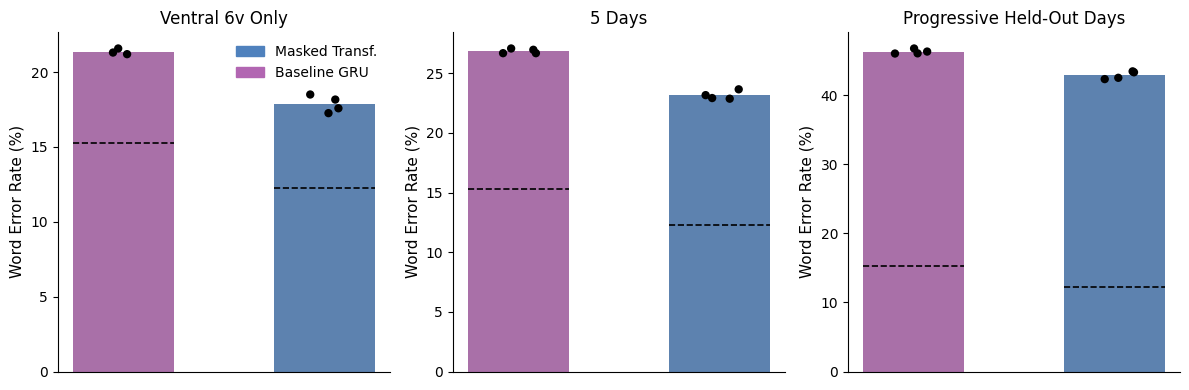

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

plot_model_perf_with_benchmark(fig, axs, 0, ventral_6v_perf, 
                               transf_orig_perf=transformer_perf, gru_orig_perf=baseline_perf, title='Ventral 6v Only')


plot_model_perf_with_benchmark(fig, axs, 1, restricted_days_perf, 
                               transf_orig_perf=transformer_perf, gru_orig_perf=baseline_perf, title='5 Days', show_legend=False)


plot_model_perf_with_benchmark(fig, axs, 2, held_out_days_perf, transf_orig_perf=transformer_perf,
                               gru_orig_perf=baseline_perf, title='Progressive Held-Out Days', show_legend=False)